In [1]:
# To perform text classification of News Headlines and classify
# news into different topics for a News Website 

In [2]:
#Loading the neccesary libraries
%matplotlib inline
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [9]:
# Defining all the categories
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
              'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']

#Training the data on these categories
train = fetch_20newsgroups(subset='train',categories = categories)

#Testing the data for the categories
test = fetch_20newsgroups(subset = 'test',categories = categories)

#printing training data
print(len(train.data))

11314


In [12]:
#Importing neccessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#Creating a model based on Multinomial Naives Bayes
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

#Training the model with the train data
model.fit(train.data,train.target)

#Creating labels for the test data
labels = model.predict(test.data)

Text(110.44999999999996, 0.5, 'predicted label')

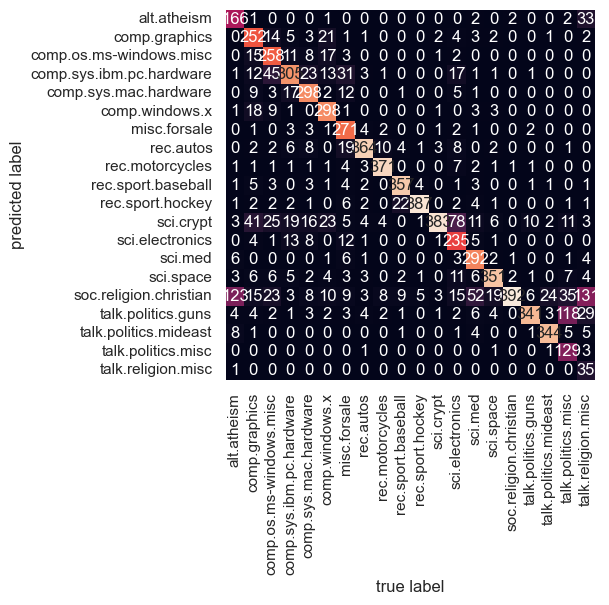

In [14]:
#Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd',cbar = False,
            xticklabels=train.target_names,
            yticklabels = train.target_names)

#plotiing Heatmap of confusion Matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [15]:
#Predicting category on new data based on trained model
def predict_category(s,train = train , model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
predict_category('RAM')


'comp.sys.mac.hardware'

In [18]:
predict_category('Jesus')

'soc.religion.christian'

In [19]:
predict_category('BMW is better then Audi')

'rec.autos'

In [20]:
predict_category('President of India')

'talk.politics.misc'